In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
SUBFOLDER = "magnets_20k_features_300_samples_v18may_v2"

In [73]:
labels_list = []
LGR_list = []
GFGWA_list = []
failure_list = []
for i in range(30):
    try:
        num = i+1
        LGR = pd.read_csv(f"../../data/{SUBFOLDER}/results_ave_mae_{num}.csv", index_col=0)
        LGR.sort_values(by="ave_MAE", inplace=True)
        labels = pd.read_csv(f"../../data/{SUBFOLDER}/magnet_positions_run_{num}.csv", index_col=0)
        GFGWA = pd.read_csv(f"../../data/{SUBFOLDER}/GFGWA_{num}.csv", index_col=0)
        LGR["percentile_LGR"] = LGR["ave_MAE"].rank(pct=True, ascending=False)
        GFGWA["percentile_GFGWA"] = GFGWA["p-value"].rank(pct=True, ascending=False)
        labels_list.append(labels)
        LGR_list.append(LGR)
        GFGWA_list.append(GFGWA)
    except:
        print(f"Failed at {i+1}")
        failure_list.append(i)

In [74]:
def Jaccard(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    #print(intersection, union)
    return len(intersection)/ len(union)

In [75]:
# for i in range(30):
#     labels_df = labels_list[i]
#     LGR_df = LGR_list[i]
#     GFGWA_df = GFGWA_list[i]

#     labels_set = set(labels_df["0"].values)
#     LGR_set = set(LGR_df["Gene"].str.replace("Feature_", "").head(5).values.astype(int))
#     jaccard_LGR = Jaccard(labels_set, LGR_set)
#     print(jaccard_LGR)
    

In [76]:
len(labels_list)

30

In [77]:
agg_df = pd.DataFrame()
lgr_hits=[]
gfgwa_hits=[]
cmor_hits=[]
for i in range(len(labels_list)):
    if i not in failure_list:
        #print(i)
        labels_df = labels_list[i]
        LGR_df = LGR_list[i]
        GFGWA_df = GFGWA_list[i]
        merged_df = pd.merge(left=LGR_df, right=GFGWA_df, left_on="Gene", right_on='Feature')
        merged_df["mean_percentile"] = (merged_df["percentile_LGR"]+ merged_df["percentile_GFGWA"])/2
        merged_df["Feature_idx"] = merged_df["Feature"].str.replace("Feature_", "").astype(int)
        merged_df["label"] = merged_df["Feature_idx"].isin(set(labels_df["0"].values))
        merged_df.sort_values(by="percentile_LGR", ascending=False, inplace=True)
        lgr_hits.append(np.sum((merged_df["label"].head(5)==True).astype(int)))
        merged_df.sort_values(by="percentile_GFGWA", ascending=False, inplace=True)
        gfgwa_hits.append(np.sum((merged_df["label"].head(5)==True).astype(int)))
        merged_df.sort_values(by="mean_percentile", ascending=False, inplace=True)
        cmor_hits.append(np.sum((merged_df["label"].head(5)==True).astype(int)))
        if np.sum((merged_df["label"].head(5)==True).astype(int)) == 0:
            print(i+1)
            print("Break")
            break

In [78]:
cmor_hits

[5,
 5,
 5,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 4,
 4,
 5,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 3,
 4,
 5,
 5,
 4,
 4,
 5,
 4,
 5,
 5]

In [79]:
merged_df.sort_values(by="percentile_LGR")

,Gene,ave_MAE,percentile_LGR,Feature,p-value,percentile_GFGWA,mean_percentile,Feature_idx,label
126,Feature_3732,0.009805,0.007874,Feature_3732,0.393298,0.611850,0.309862,3732,False
125,Feature_13829,0.009764,0.015748,Feature_13829,0.953653,0.047050,0.031399,13829,False
124,Feature_9388,0.009751,0.023622,Feature_9388,0.877923,0.123775,0.073699,9388,False
123,Feature_735,0.009747,0.031496,Feature_735,0.146398,0.852825,0.442161,735,False
122,Feature_2469,0.009744,0.039370,Feature_2469,0.712646,0.289600,0.164485,2469,False
...,...,...,...,...,...,...,...,...,...
4,Feature_12218,0.009515,0.968504,Feature_12218,0.134896,0.863925,0.916214,12218,True
3,Feature_212,0.009365,0.976378,Feature_212,0.080526,0.920900,0.948639,212,True
2,Feature_10429,0.009320,0.984252,Feature_10429,0.002791,0.997600,0.990926,10429,True
1,Feature_1858,0.009218,0.992126,Feature_1858,0.000181,0.999800,0.995963,1858,True


In [80]:
print(np.sum(lgr_hits), np.sum(gfgwa_hits), np.sum(cmor_hits))

133 93 135


In [81]:
print(np.sum(lgr_hits)/150, np.sum(gfgwa_hits)/150, np.sum(cmor_hits)/150)

0.8866666666666667 0.62 0.9


In [82]:
print(np.mean(lgr_hits), np.mean(gfgwa_hits), np.mean(cmor_hits))

4.433333333333334 3.1 4.5


In [83]:
print(np.std(lgr_hits), np.std(gfgwa_hits), np.std(cmor_hits))

0.6155395104206464 1.044030650891055 0.5627314338711378


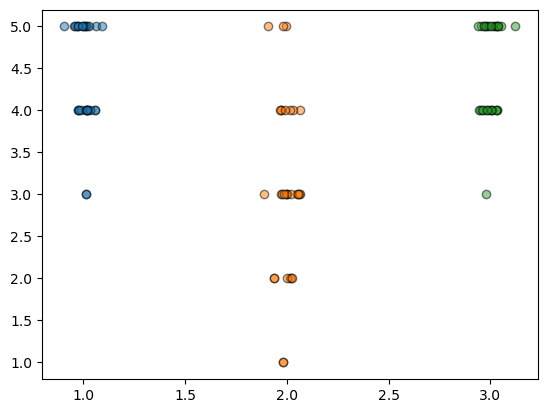

In [84]:
y= lgr_hits
plt.scatter(y=y, x = np.random.normal(1, 0.04, size=len(y)), alpha=0.5, edgecolors='k')
y= gfgwa_hits
plt.scatter(y=y, x = np.random.normal(2, 0.04, size=len(y)), alpha=0.5, edgecolors='k')
y= cmor_hits
plt.scatter(y=y, x = np.random.normal(3, 0.04, size=len(y)), alpha=0.5, edgecolors='k')

Text(0, 0.5, 'Number of hits')

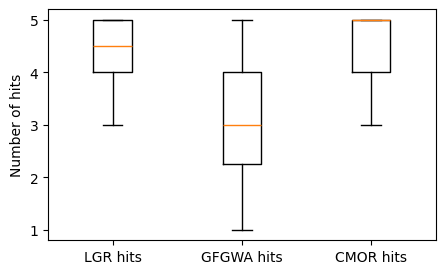

In [85]:
plt.figure(figsize=(5, 3))
plt.boxplot([lgr_hits, gfgwa_hits, cmor_hits], 
            labels=['LGR hits', 'GFGWA hits', 'CMOR hits'])
plt.ylabel("Number of hits")

In [86]:
min(lgr_hits)

3

Text(0, 0.5, 'Number of hits')

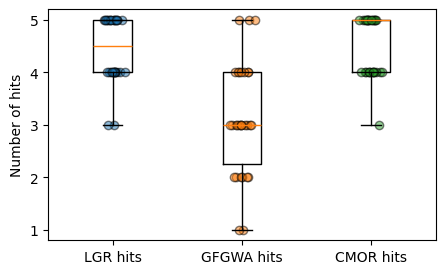

In [87]:
#print(merged_df.head())
plt.figure(figsize=(5, 3))
plt.boxplot([lgr_hits, gfgwa_hits, cmor_hits], 
            labels=['LGR hits', 'GFGWA hits', 'CMOR hits'])
y= lgr_hits
plt.scatter(y=y, x = np.random.normal(1, 0.04, size=len(y)), alpha=0.5, edgecolors='k')
y= gfgwa_hits
plt.scatter(y=y, x = np.random.normal(2, 0.04, size=len(y)), alpha=0.5, edgecolors='k')
y= cmor_hits
plt.scatter(y=y, x = np.random.normal(3, 0.04, size=len(y)), alpha=0.5, edgecolors='k')
plt.ylabel("Number of hits")

In [88]:
GFGWA_df

,Feature,p-value,percentile_GFGWA
19314,Feature_19314,0.000010,1.000000
13640,Feature_13640,0.000024,0.999950
1827,Feature_1827,0.000057,0.999900
7752,Feature_7752,0.000139,0.999850
1858,Feature_1858,0.000181,0.999800
...,...,...,...
5117,Feature_5117,1.000544,0.000225
18566,Feature_18566,1.000544,0.000225
13801,Feature_13801,1.000569,0.000150
630,Feature_630,1.000572,0.000075


In [89]:
np.sum((merged_df["label"].head(5)==True).astype(int))

5